In [12]:
import os
import numpy as np
import xarray as xr
import json

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs

import mw_algorithm as mw

# MW_Protocol - Visual tools

In [3]:
 # ! TO REPLACE WITH YOUR OWN DIRECTORY
script_directory =os.getcwd()

inputs_folder = f"{script_directory}/inputs"
outputs_folder = f"{script_directory}/outputs"

In [4]:
# Land sea mask
ds_bathy = xr.open_dataset(f"{inputs_folder}/bathy_20ka.nc")
lsm = xr.where(ds_bathy.bathy_metry.isel(time_counter=0) > 0, 0, 1)
ds_bathy

<xarray.Dataset> Size: 3MB
Dimensions:       (time_counter: 1, y: 800, x: 544)
Coordinates:
  * time_counter  (time_counter) float32 4B 0.0
Dimensions without coordinates: y, x
Data variables:
    bathy_metry   (time_counter, y, x) float64 3MB ...
Attributes:
    DOMAIN_number_total:     1
    DOMAIN_number:           0
    DOMAIN_dimensions_ids:   [1 2]
    DOMAIN_size_global:      [544 800]
    DOMAIN_size_local:       [544 800]
    DOMAIN_position_first:   [1 1]
    DOMAIN_position_last:    [544 800]
    DOMAIN_halo_size_start:  [0 0]
    DOMAIN_halo_size_end:    [0 0]
    DOMAIN_type:             BOX
    history:                 Tue Mar 18 08:54:14 2025: ncks -v bathy_metry me...
    NCO:                     netCDF Operators version 5.3.2 (Homepage = http:...

In [5]:
# Ref NEMO file
ds_ref = xr.open_dataset(f"{inputs_folder}/ANHA4_ReNat_HydroGFD_HBC_runoff_monthly_y2003.nc", decode_times=False)
ds_ref

<xarray.Dataset> Size: 47MB
Dimensions:       (y: 800, x: 544, time_counter: 12)
Coordinates:
  * time_counter  (time_counter) float64 96B 2.009e+04 2.012e+04 ... 2.042e+04
Dimensions without coordinates: y, x
Data variables:
    nav_lon       (y, x) float32 2MB ...
    nav_lat       (y, x) float32 2MB ...
    socoefr       (y, x) float32 2MB ...
    runoff        (time_counter, y, x) float32 21MB ...
    rotemper      (time_counter, y, x) float32 21MB ...
Attributes:
    source:   HYPE ReNat runoff for HydroGFD BaySys run for 1981 to 2019 (13-...

In [8]:
grid_ref = mw.Grid(
    ds_ref.nav_lon.values,
    ds_ref.nav_lat.values,
    ds_bathy)

## Visualing Collection boxes and spreading regions

In [9]:
with open(f"{inputs_folder}/collection_boxes.json", 'r') as json_file:
    boxes_data = json.load(json_file)['collection_boxes']

collection_boxes = {key: mw.CollectionBox(*boxes_data[key]['coords'],
                                       boxes_data[key]['region'],
                                       grid_ref) for key in boxes_data.keys()}
collection_boxes

{'USECoast1': <mw_algorithm.CollectionBox at 0x7f13bf330d90>,
 'USECoast2': <mw_algorithm.CollectionBox at 0x7f15480a8c70>,
 'USECoast3': <mw_algorithm.CollectionBox at 0x7f13c40418e0>,
 'USECoast4': <mw_algorithm.CollectionBox at 0x7f13c4041ca0>,
 'USECoast5': <mw_algorithm.CollectionBox at 0x7f13c4041d00>,
 'USECoast6': <mw_algorithm.CollectionBox at 0x7f13c4041c70>,
 'GrArc1': <mw_algorithm.CollectionBox at 0x7f13c4041eb0>,
 'NAMArc1': <mw_algorithm.CollectionBox at 0x7f13dcf14e80>,
 'NAMArc2': <mw_algorithm.CollectionBox at 0x7f13dcf14790>,
 'NAMArc3': <mw_algorithm.CollectionBox at 0x7f13dcf14ac0>,
 'NAMArc4': <mw_algorithm.CollectionBox at 0x7f13dcf14eb0>,
 'NAMArc5': <mw_algorithm.CollectionBox at 0x7f13dcf14940>,
 'NWTerr1': <mw_algorithm.CollectionBox at 0x7f13dcf14f70>,
 'NWTerr2': <mw_algorithm.CollectionBox at 0x7f13dcca0d60>,
 'GrLakes1': <mw_algorithm.CollectionBox at 0x7f13dcca0790>,
 'GoM1': <mw_algorithm.CollectionBox at 0x7f13dcca0fd0>,
 'EPac1': <mw_algorithm.Collect

In [10]:
## Import spreading regions from JSON file

with open(f"{inputs_folder}/spreading_regions.json", 'r') as json_file:
    spreading_regions = json.load(json_file)['spreading_regions']

spreading_regions

{'US_East_Coast': {'collection_boxes': ['USECoast1',
   'USECoast2',
   'USECoast3',
   'USECoast4',
   'USECoast5',
   'USECoast6',
   'GrLakes1'],
  'spreading_boxes': ['USECoast1',
   'USECoast2',
   'USECoast3',
   'USECoast4',
   'USECoast4',
   'USECoast5']},
 'Greenland_Arctic': {'collection_boxes': ['GrArc1'],
  'spreading_boxes': ['GrArc1']},
 'N_American_Arctic': {'collection_boxes': ['NAMArc1',
   'NAMArc2',
   'NAMArc3',
   'NAMArc4',
   'NAMArc5',
   'NWTerr1',
   'NWTerr2'],
  'spreading_boxes': ['NAMArc1', 'NAMArc2', 'NAMArc3', 'NAMArc4']},
 'Gulf_of_Mexico': {'collection_boxes': ['GoM1'], 'spreading_boxes': ['GoM1']},
 'East_Pacific': {'collection_boxes': ['EPac1',
   'EPac2',
   'EPac3',
   'EPac4',
   'EPac5'],
  'spreading_boxes': ['EPac1', 'EPac2', 'EPac3', 'EPac4', 'EPac5']},
 'Russia_Pacific': {'collection_boxes': ['RussPac1'],
  'spreading_boxes': ['RussPac1']},
 'LabradorSea_BaffinBay': {'collection_boxes': ['BafLab1',
   'BafLab2',
   'BafLab3',
   'HudBay1',
 

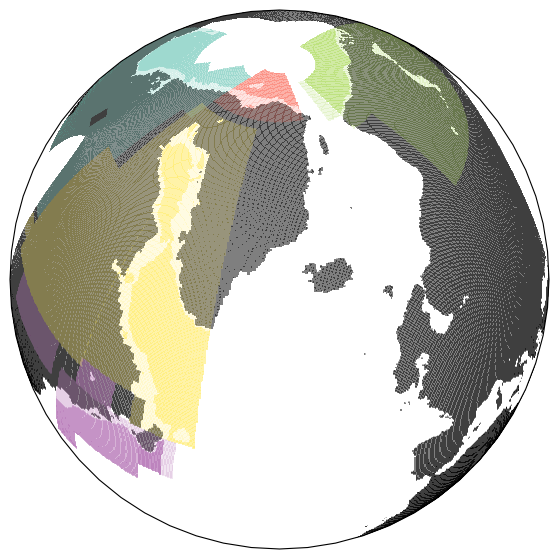

In [15]:
# Collection boxes and spreading regions:

# Only collection boxes

projection = ccrs.NearsidePerspective(central_longitude=-30, central_latitude=65, satellite_height=3000000)
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(14,7), subplot_kw={'projection':projection})

ax.pcolormesh(ds_ref.nav_lon, ds_ref.nav_lat, lsm, cmap="binary", alpha=0.5,
                     transform=ccrs.PlateCarree())

# regions_to_plot = list(spreading_regions.keys())
regions_to_plot = ['N_American_Arctic','Greenland_Arctic','Eurasian_Arctic',
                   'US_East_Coast','LabradorSea_BaffinBay']

# Assigning autoamatic colors to each region
cmap = plt.get_cmap('Set3')
colors = [cmap(i) for i in np.linspace(0, 1, len(regions_to_plot))]


for idr, region in enumerate(regions_to_plot):

    for box in spreading_regions[region]['collection_boxes']:
        # Get the polygon for the box
        polygon = collection_boxes[box].get_box()
        # Create the mask for this box (True where inside the box)
        mask = collection_boxes[box].get_mask()
        # Plot the mask as a colored overlay (Collection boxes are more transparent)
        ax.pcolormesh(
            ds_ref.nav_lon, ds_ref.nav_lat, np.where(mask,1,np.nan), 
            cmap=mcolors.ListedColormap([colors[idr]]),
            alpha=0.2, transform=ccrs.PlateCarree()
        )

    for box in spreading_regions[region]['spreading_boxes']:
        # Get the polygon for the box
        polygon = collection_boxes[box].get_box()
        # Create the mask for this box (True where inside the box)
        mask = np.logical_and(collection_boxes[box].get_mask(), grid_ref.get_depth_mask(depth=500))
        # Plot the mask as a colored overlay (Spreading boxes are more opaque)
        ax.pcolormesh(
            ds_ref.nav_lon, ds_ref.nav_lat, np.where(mask,1,np.nan), 
            cmap=mcolors.ListedColormap([colors[idr]]),
            alpha=0.5, transform=ccrs.PlateCarree()
        )


## Visualising output files

### Point discharge

In [19]:
discharge_point = xr.open_dataset(f"{outputs_folder}/glac1d_freshwater_nemo_shifted.nc").fw_discharge
discharge_point

<xarray.DataArray 'fw_discharge' (time: 261, y: 800, x: 544)> Size: 909MB
[113587200 values with dtype=float64]
Coordinates:
  * time          (time) float64 2kB -26.0 -25.9 -25.8 -25.7 ... -0.2 -0.1 0.0
    time_counter  float32 4B ...
Dimensions without coordinates: y, x

Text(0.5, 0.98, 'Routed GLAC-1D freshwater discharge at 25ka BP on NEMO grid')

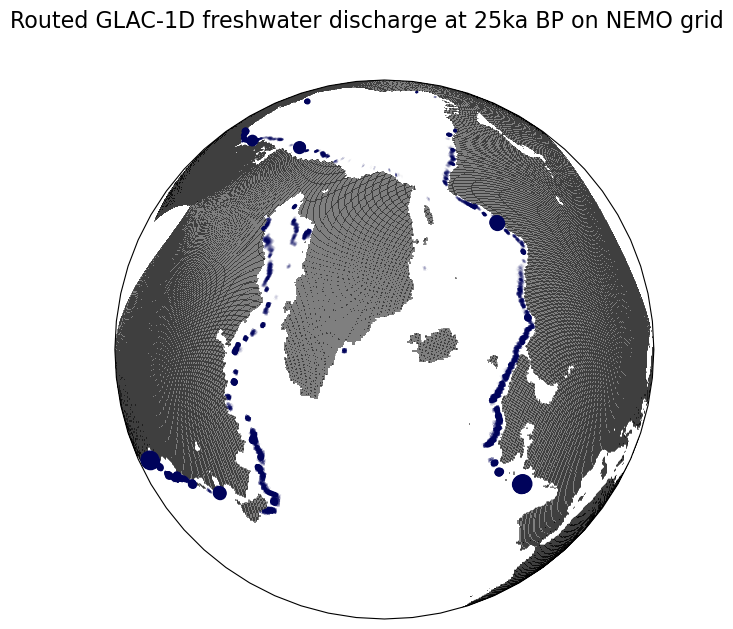

In [20]:
time_step = -25
projection = ccrs.NearsidePerspective(central_longitude=-30, central_latitude=65, satellite_height=3000000)

fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(14,7), subplot_kw={'projection':projection})

ax.pcolormesh(ds_ref.nav_lon, ds_ref.nav_lat, lsm, cmap="binary", alpha=0.5,
                     transform=ccrs.PlateCarree())

ax.scatter(ds_ref.nav_lon, ds_ref.nav_lat,s=-1e-6*discharge_point.sel(time=time_step),c='xkcd:dark blue',
           transform=ccrs.PlateCarree(), zorder=1)

fig.suptitle(f"Routed GLAC-1D freshwater discharge at {-time_step}ka BP on NEMO grid", fontsize=16)

### Spread discharge

In [17]:
discharge_spread = xr.open_dataset(f"{outputs_folder}/glac1d_freshwater_nemo_spread.nc").fw_discharge
discharge_spread = discharge_spread.where(discharge_spread != 0)
discharge_spread

<xarray.DataArray 'fw_discharge' (time: 261, y: 800, x: 544)> Size: 909MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) float64 2kB -26.0 -25.9 -25.8 -25.7 ... -0.3 -0.2 -0.1 0.0
  * y        (y) int32 3kB 0 1 2 3 4 5 6 7 8 ... 792 793 794 795 796 797 798 799
  * x        (x) int32 2kB 0 1 2 3 4 5 6 7 8 ... 536 537 538 539 540 541 542 543

Text(0.5, 0.98, 'Spread GLAC-1D freshwater discharge at 25ka BP on NEMO grid')

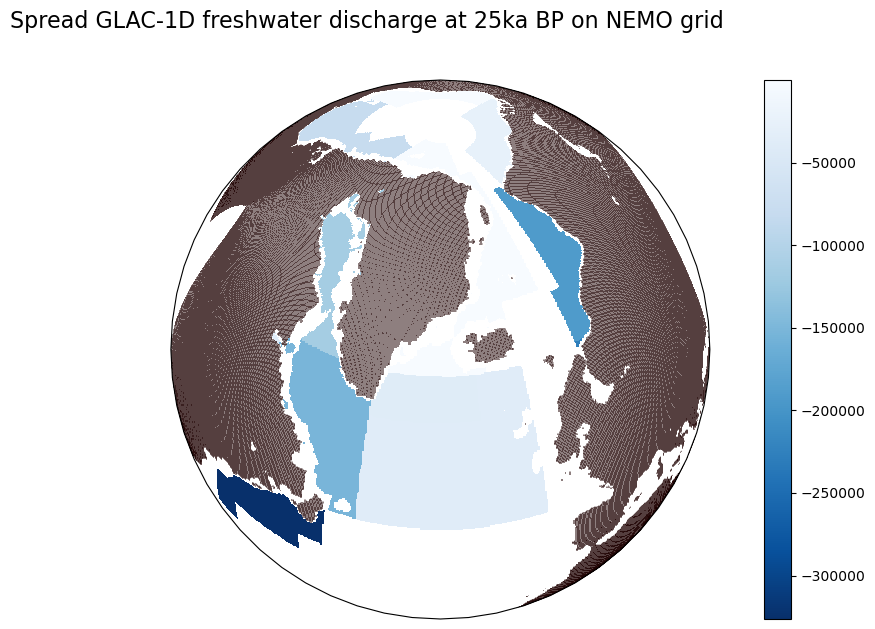

In [21]:
projection = ccrs.NearsidePerspective(central_longitude=-30, central_latitude=65, satellite_height=3000000)
time_step = -25

fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(14,7), subplot_kw={'projection':projection})

ax.pcolormesh(ds_ref.nav_lon, ds_ref.nav_lat, lsm, cmap="pink_r", alpha=0.5,
                     transform=ccrs.PlateCarree())


cm = ax.pcolormesh(ds_ref.nav_lon, ds_ref.nav_lat, discharge_spread.sel(time=time_step), 
              cmap='Blues_r', transform=ccrs.PlateCarree())
plt.colorbar(cm)

fig.suptitle(f"Spread GLAC-1D freshwater discharge at {-time_step}ka BP on NEMO grid", fontsize=16)